In [1]:
from vega_datasets import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# vega_datasets-sf.temp

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df.index = df.date
df = df.drop(columns='date')

In [5]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


**1).Resample by the day and take the average temperature. Visualize the average temperature over time.**

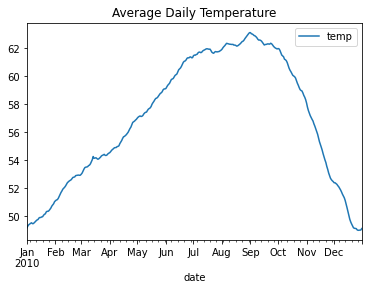

In [6]:
# average temp by day over time
df.resample('D').mean().plot(title='Average Daily Temperature')
plt.show()

**2).Write the code necessary to visualize the minimum temperature over time.**

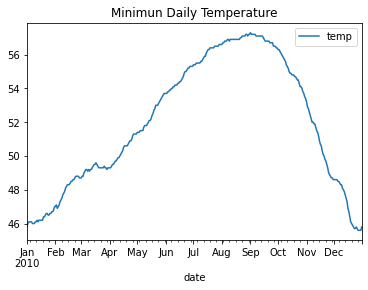

In [7]:
# min temp by day over time
df.resample('D').min().plot(title='Minimun Daily Temperature')
plt.show()

**3).Write the code necessary to visualize the maximum temperature over time.**

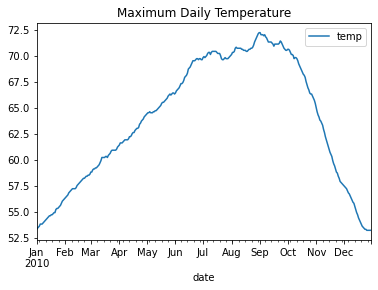

In [8]:
# max temp over time by day
df.resample('D').max().plot(title='Maximum Daily Temperature')
plt.show()

**4).Which month is the coldest, on average?**
### Answer: January

In [9]:
df['month'] = df.index.strftime('%m-%b')
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,01-Jan
2010-01-01 01:00:00,47.4,01-Jan
2010-01-01 02:00:00,46.9,01-Jan
2010-01-01 03:00:00,46.5,01-Jan
2010-01-01 04:00:00,46.0,01-Jan


**5).Which month has the highest average temperature?**
### Answer: September

In [10]:
df['month'] = df.index.strftime('%m-%b')
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,01-Jan
2010-01-01 01:00:00,47.4,01-Jan
2010-01-01 02:00:00,46.9,01-Jan
2010-01-01 03:00:00,46.5,01-Jan
2010-01-01 04:00:00,46.0,01-Jan


**6).Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [11]:
# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max']))
by_day = df.resample('D').agg(['min', 'max'])
by_day.head()

temp         month        
             min   max     min     max
date                                  
2010-01-01  45.8  53.3  01-Jan  01-Jan
2010-01-02  46.0  53.4  01-Jan  01-Jan
2010-01-03  46.1  53.5  01-Jan  01-Jan
2010-01-04  46.1  53.6  01-Jan  01-Jan
2010-01-05  46.1  53.8  01-Jan  01-Jan

In [12]:
# Use this resampled dataframe to calculate the change in temperature for the day.
by_day['change'] = by_day.temp['max'] - by_day.temp['min']
by_day.head()

temp         month         change
             min   max     min     max       
date                                         
2010-01-01  45.8  53.3  01-Jan  01-Jan    7.5
2010-01-02  46.0  53.4  01-Jan  01-Jan    7.4
2010-01-03  46.1  53.5  01-Jan  01-Jan    7.4
2010-01-04  46.1  53.6  01-Jan  01-Jan    7.5
2010-01-05  46.1  53.8  01-Jan  01-Jan    7.7

In [13]:
# Which month has the highest daily temperature variability?
by_day.change.resample('M').mean().idxmax().month


9


**7).Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.**

In [14]:
by_day = df.resample('D').agg(['min', 'max', 'mean'])


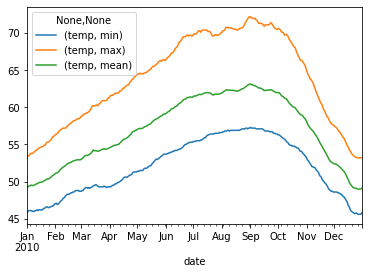

In [15]:
by_day.plot()
plt.show()

## **EXTRA**

In [16]:
df['shift(-1)'] = df.temp.shift(-1)
df['shift(1)'] = df.temp.shift(1)
df['shift(3)'] = df.temp.shift(3)
df['diff(1)'] = df.temp.diff(1)
df['diff(3)'] = df.temp.diff(3)
df.head(25)

,temp,month,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,,
2010-01-01 00:00:00,47.8,01-Jan,47.4,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,47.4,01-Jan,46.9,47.8,NaN,-0.4,NaN
2010-01-01 02:00:00,46.9,01-Jan,46.5,47.4,NaN,-0.5,NaN
2010-01-01 03:00:00,46.5,01-Jan,46.0,46.9,47.8,-0.4,-1.3
2010-01-01 04:00:00,46.0,01-Jan,45.8,46.5,47.4,-0.5,-1.4
2010-01-01 05:00:00,45.8,01-Jan,45.9,46.0,46.9,-0.2,-1.1
2010-01-01 06:00:00,45.9,01-Jan,45.9,45.8,46.5,0.1,-0.6
2010-01-01 07:00:00,45.9,01-Jan,46.4,45.9,46.0,0.0,-0.1
2010-01-01 08:00:00,46.4,01-Jan,48.0,45.9,45.8,0.5,0.6


In [17]:
df.temp.head()

date
2010-01-01 00:00:00    47.8
2010-01-01 01:00:00    47.4
2010-01-01 02:00:00    46.9
2010-01-01 03:00:00    46.5
2010-01-01 04:00:00    46.0
Name: temp, dtype: float64

In [18]:
df.describe()

,temp,shift(-1),shift(1),shift(3),diff(1),diff(3)
count,8759.000000,8758.000000,8758.000000,8756.000000,8758.000000,8756.000000
mean,56.924112,56.925154,56.925097,56.926884,0.000057,0.000503
std,6.107079,6.106649,6.106732,6.106282,1.232681,3.470757
min,45.600000,45.600000,45.600000,45.600000,-3.000000,-7.600000
25%,52.300000,52.300000,52.300000,52.300000,-0.600000,-1.900000
50%,56.500000,56.500000,56.500000,56.500000,-0.300000,-1.000000
75%,60.700000,60.700000,60.700000,60.700000,0.975000,2.900000
max,72.200000,72.200000,72.200000,72.200000,3.300000,7.700000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       8759 non-null   float64
 1   month      8759 non-null   object 
 2   shift(-1)  8758 non-null   float64
 3   shift(1)   8758 non-null   float64
 4   shift(3)   8756 non-null   float64
 5   diff(1)    8758 non-null   float64
 6   diff(3)    8756 non-null   float64
dtypes: float64(6), object(1)
memory usage: 547.4+ KB


,temp,shift(-1),shift(1),shift(3),diff(1),diff(3),rolling_3,rolling_5,rolling_7
date,,,,,,,,,
2010-01-03,49.288889,49.293056,49.298592,49.297101,0.011268,0.075362,NaN,NaN,NaN
2010-01-10,49.507143,49.507143,49.505952,49.503571,0.001190,0.003571,NaN,NaN,NaN
2010-01-17,49.829167,49.830952,49.827976,49.823810,0.001190,0.005357,49.541733,NaN,NaN
2010-01-24,50.192262,50.194643,50.190476,50.186905,0.001786,0.005357,49.842857,NaN,NaN
2010-01-31,50.705952,50.710119,50.701786,50.693452,0.004167,0.012500,50.242460,49.904683,NaN
2010-02-07,51.338690,51.342262,51.334524,51.326786,0.004167,0.011905,50.745635,50.314643,NaN
2010-02-14,52.095238,52.099405,52.091667,52.085714,0.003571,0.009524,51.379960,50.832262,50.422477
2010-02-21,52.630357,52.631548,52.629167,52.626190,0.001190,0.004167,52.021429,51.392500,50.899830
2010-02-28,52.911310,52.911310,52.911310,52.912500,0.000000,-0.001190,52.545635,51.936310,51.386139


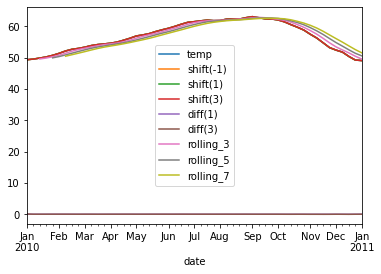

In [20]:
df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.temp.rolling(3).mean(),
    rolling_5=lambda df: df.temp.rolling(5).mean(),
    rolling_7=lambda df: df.temp.rolling(7).mean(),
)
df.plot()
df.head(20)

# vega_datasets-seattle_weather


In [21]:
df1 = data.seattle_weather()
df1.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [22]:
df1.index = df1.date
df1 = df1.drop(columns='date')
df1.weather.sort_values().unique()

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

## Use the dataset to answer the following questions:



**Which year and month combination has the highest amount of precipitation?**

In [23]:
(df1.resample('M').sum().precipitation.idxmax().year, 
 df1.resample('M').sum().precipitation.idxmax().month) 


(2015, 12)

**Visualize the amount of monthly precipitation over time.**


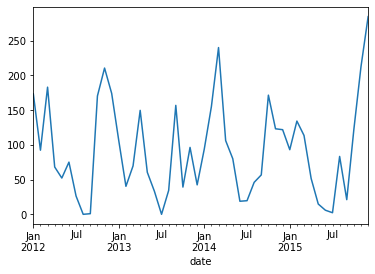

In [24]:
df1.precipitation.resample('M').sum().plot()
plt.show()

**Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

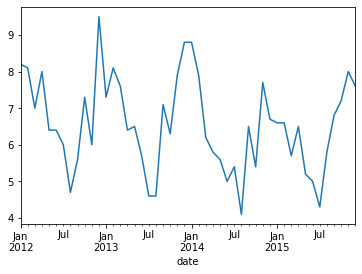

In [59]:
df1.wind.resample('M').max().plot()
plt.show()

**Which year-month combination is the windiest?**



In [26]:
(df1.wind.resample('M').mean().idxmax().year,
 df1.wind.resample('M').mean().idxmax().month)

(2014, 2)

**What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [27]:
(df1.weather == 'sun').resample('Y').sum().idxmax().year


2014

**In which month does it rain the most?**



In [28]:
df1['month'] = df1.index.month
df1['rain'] = (df1.weather == 'rain')
df1.groupby(by='month').mean().rain.idxmax()

2

**Which month has the most number of days with a non-zero amount of precipitation?**



In [29]:
df1['some_precip'] = (df1.precipitation > 0)
by_month = df1.resample('M').sum()
by_month['month'] = by_month.index.month
by_month.groupby(by='month').mean().some_precip.idxmax()

12

# vega_datasets-data.flights_20k()

In [30]:
df3 = data.flights_20k()
df3.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [31]:
df3.index = df3.date
df3 = df3.drop(columns='date')

In [32]:
df3['month'] = df3.index.month
df3['weekday'] = df3.index.weekday
df3['hour'] = df3.index.hour


**1).Convert any negative delays to 0.**


In [33]:
df3['delay'] = np.where(df3.delay < 0, 0, df3.delay)

df3.head()


,delay,distance,origin,destination,month,weekday,hour
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,1,5,14
2001-01-31 16:40:00,0,1093,FLL,ISP,1,2,16
2001-02-11 18:39:00,3,293,LBB,DAL,2,6,18
2001-01-10 21:00:00,0,550,MSY,MCO,1,2,21
2001-03-30 21:45:00,0,229,STL,IND,3,4,21


**2).Which hour of the day has the highest average delay?**


In [34]:
df3.groupby(by='hour').delay.mean().idxmax()

3

In [35]:
df3.groupby(by='hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

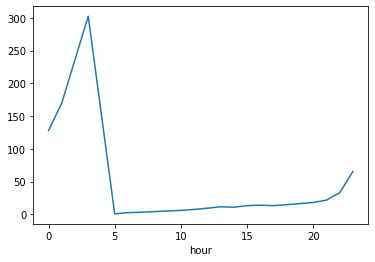

In [36]:
df3.groupby(by='hour').delay.mean().plot()
plt.show()

**3).Does the day of the week make a difference in the delay amount?**


In [61]:
df3.groupby(by='weekday').delay.mean().idxmax()

4

In [38]:
df3.groupby(by='weekday').delay.mean()

weekday
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

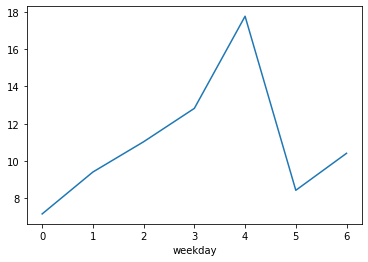

In [39]:
df3.groupby(by='weekday').delay.mean().plot()
plt.show()

**4).Does the month make a difference in the delay amount?**


In [40]:
df3.groupby(by='month').delay.mean().idxmax()

2

In [41]:
df3.groupby(by='month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

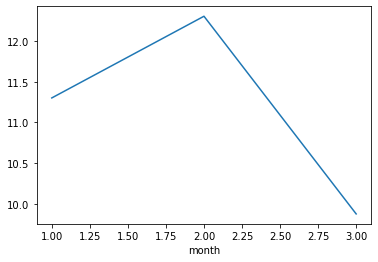

In [42]:
df3.groupby(by='month').delay.mean().plot()
plt.show()

# Bonus:

# vega_datasets-iowa_electricity()

In [43]:
df4 = data.iowa_electricity()
df4.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [44]:
df4.source.sort_values().unique()

array(['Fossil Fuels', 'Nuclear Energy', 'Renewables'], dtype=object)

In [45]:
df4.net_generation.sort_values().nunique()

51

In [46]:
df4.index = df4.year
df4 = df4.drop(columns='year')

In [47]:
df4['years'] = df4.index.year
df4['month'] = df4.index.month
df4['weekday'] = df4.index.weekday

In [48]:
df4.years.sort_values().nunique()

17

In [49]:
df4.month.sort_values().nunique()

1

In [50]:
df4.weekday.sort_values().nunique()

7

In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2001-01-01 to 2017-01-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          51 non-null     object
 1   net_generation  51 non-null     int64 
 2   years           51 non-null     int64 
 3   month           51 non-null     int64 
 4   weekday         51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


In [52]:
df4.head()

,source,net_generation,years,month,weekday
year,,,,,
2001-01-01,Fossil Fuels,35361,2001,1,0
2002-01-01,Fossil Fuels,35991,2002,1,1
2003-01-01,Fossil Fuels,36234,2003,1,2
2004-01-01,Fossil Fuels,36205,2004,1,3
2005-01-01,Fossil Fuels,36883,2005,1,5


**1).For each row, calculate the percentage of the year's total that energy source provided.**

In [53]:
df4 = df4.merge(df4.groupby(by='year').sum().rename(columns={'net_generation': 'yearly_total'}), on='year')
df4['proportion'] = df4.net_generation / df4.yearly_total


In [54]:
df4.head()

,source,net_generation,years_x,month_x,weekday_x,yearly_total,years_y,month_y,weekday_y,proportion
year,,,,,,,,,,
2001-01-01,Fossil Fuels,35361,2001,1,0,40651,6003,3,0,0.869868
2001-01-01,Nuclear Energy,3853,2001,1,0,40651,6003,3,0,0.094782
2001-01-01,Renewables,1437,2001,1,0,40651,6003,3,0,0.035350
2002-01-01,Fossil Fuels,35991,2002,1,1,42528,6006,3,3,0.846290
2002-01-01,Nuclear Energy,4574,2002,1,1,42528,6006,3,3,0.107553


**2).Lineplot of generation over time, color by source**

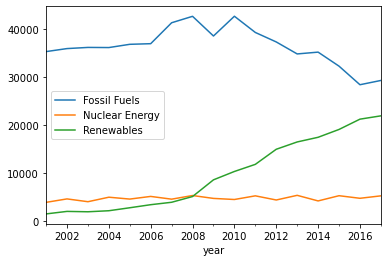

In [55]:
df4.groupby(by='source').net_generation.plot()
plt.legend(loc='best')
plt.show()

**3).Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)**



In [56]:
df4.drop(columns=['yearly_total', 'proportion']).pivot_table(index='source', columns='year')


month_x                                              \
year           2001-01-01 2002-01-01 2003-01-01 2004-01-01 2005-01-01   
source                                                                  
Fossil Fuels            1          1          1          1          1   
Nuclear Energy          1          1          1          1          1   
Renewables              1          1          1          1          1   

                                                                       ...  \
year           2006-01-01 2007-01-01 2008-01-01 2009-01-01 2010-01-01  ...   
source                                                                 ...   
Fossil Fuels            1          1          1          1          1  ...   
Nuclear Energy          1          1          1          1          1  ...   
Renewables              1          1          1          1          1  ...   

                  years_y                                              \
year           2008-01-01 2009-01-01 2010-01-01 2011-01-01 2012-01-01   
source                                                                  
Fossil Fuels         6024       6027       6030       6033       6036   
Nuclear Energy       6024       6027       6030       6033       6036   
Renewables           6024       6027       6030       6033       6036   

                                                                       
year           2013-01-01 2014-01-01 2015-01-01 2016-01-01 2017-01-01  
source                                                                 
Fossil Fuels         6039       6042       6045       6048       6051  
Nuclear Energy       6039       6042       6045       6048       6051  
Renewables           6039       6042       6045       6048       6051  

[3 rows x 119 columns]

**4).Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?**



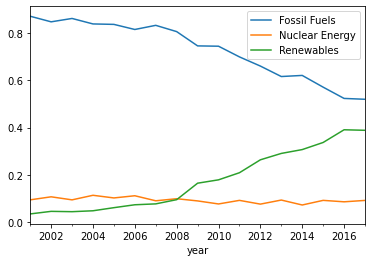

In [57]:
df4.groupby(by='source').proportion.plot()
plt.legend(loc='best')
plt.show()

**5).Is the total generation increasing over time?**



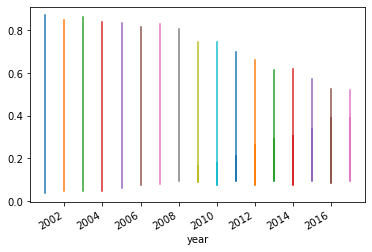

In [58]:
df4.groupby(by='year').proportion.plot()
plt.show()

**5a).How would you control for increasing consumption over time when considering how much energy is coming from each source?**



**5b).express each number as a % of the year's total**

